In [117]:
import numpy as np
import pandas as pd
import sklearn
import os
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection, preprocessing, metrics
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingClassifier, VotingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score,confusion_matrix 
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
#import xgboost as xgb
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [118]:
#Reading data
path = 'C:/Users/rithesh/Desktop/Apple_challenge/'
data_df=pd.read_excel(path+'Subscription Dataset.xlsx')
print(data_df.dtypes)

Subscription Id                              int64
Subscription Mode                           object
Subscription Purchase Date          datetime64[ns]
Subscription Cancellation Date      datetime64[ns]
Churn Ind                                   object
Country of subscription purchase            object
Purchase Channel                            object
Subscription sold by Carrier                object
Store id of subscription sale              float64
Device Covered - Product Line               object
Device Covered - SKU                        object
Device Covered - Capacity                   object
Device Covered - Color                      object
dtype: object


In [119]:
print(data_df.shape)

(110000, 13)


In [120]:
#Missing values
data_df.isnull().sum()

Subscription Id                          0
Subscription Mode                        0
Subscription Purchase Date               0
Subscription Cancellation Date      100000
Churn Ind                                0
Country of subscription purchase        11
Purchase Channel                         0
Subscription sold by Carrier             0
Store id of subscription sale         2199
Device Covered - Product Line            0
Device Covered - SKU                  1253
Device Covered - Capacity             6262
Device Covered - Color                3087
dtype: int64

In [121]:
data_df.head()

,Subscription Id,Subscription Mode,Subscription Purchase Date,Subscription Cancellation Date,Churn Ind,Country of subscription purchase,Purchase Channel,Subscription sold by Carrier,Store id of subscription sale,Device Covered - Product Line,Device Covered - SKU,Device Covered - Capacity,Device Covered - Color
0,34645276,Subscription Product Carrier,2018-09-21,NaT,N,Country 20,Channel 1,Carrier 7,12458799.0,Product Line 3,SKU70,Low,crimson
1,34645277,Subscription Product 6,2018-11-23,2018-12-08,Y,Country 20,Channel 8,Non Carrier,12054878.0,Product Line 3,SKU72,High,crimson
2,34645278,Subscription Product Carrier,2018-11-03,NaT,N,Country 20,Channel 1,Carrier 8,10457799.0,Product Line 3,SKU4,Very Low,Bronze
3,34645279,Subscription Product 6,2018-10-22,NaT,N,Country 20,Channel 3,Non Carrier,14964174.0,Product Line 3,SKU72,High,Bronze
4,34645280,Subscription Product 4,2018-10-20,NaT,N,Country 20,Channel 4,Non Carrier,NaN,Product Line 3,SKU72,High,crimson


In [122]:
data_df.loc[data_df['Churn Ind'] == 'N']

,Subscription Id,Subscription Mode,Subscription Purchase Date,Subscription Cancellation Date,Churn Ind,Country of subscription purchase,Purchase Channel,Subscription sold by Carrier,Store id of subscription sale,Device Covered - Product Line,Device Covered - SKU,Device Covered - Capacity,Device Covered - Color
0,34645276,Subscription Product Carrier,2018-09-21,NaT,N,Country 20,Channel 1,Carrier 7,12458799.0,Product Line 3,SKU70,Low,crimson
2,34645278,Subscription Product Carrier,2018-11-03,NaT,N,Country 20,Channel 1,Carrier 8,10457799.0,Product Line 3,SKU4,Very Low,Bronze
3,34645279,Subscription Product 6,2018-10-22,NaT,N,Country 20,Channel 3,Non Carrier,14964174.0,Product Line 3,SKU72,High,Bronze
4,34645280,Subscription Product 4,2018-10-20,NaT,N,Country 20,Channel 4,Non Carrier,NaN,Product Line 3,SKU72,High,crimson
5,34645281,Subscription Product Carrier,2018-11-26,NaT,N,Country 20,Channel 1,Carrier 7,12458799.0,Product Line 3,SKU64,Medium,Brown
6,34645282,Subscription Product Carrier,2018-11-01,NaT,N,Country 10,Channel 1,Carrier 4,9957183.0,Product Line 3,SKU72,Low,crimson
7,34645283,Subscription Product 6,2018-11-03,NaT,N,Country 20,Channel 8,Non Carrier,12054878.0,Product Line 3,SKU70,High,mustard
8,34645284,Subscription Product Carrier,2018-10-21,NaT,N,Country 10,Channel 1,Carrier 5,13244430.0,Product Line 3,SKU70,High,mustard
9,34645285,Subscription Product Carrier,2018-10-26,NaT,N,Country 20,Channel 1,Carrier 6,13484735.0,Product Line 3,SKU64,Low,lemon
10,34645286,Subscription Product Carrier,2018-11-04,NaT,N,Country 20,Channel 1,Carrier 7,12458799.0,Product Line 3,SKU36,Low,Bronze


In [123]:
present_date= datetime.datetime(2019, 1, 12) #current_date
data_df['Subscription Cancellation Date'] = data_df['Subscription Cancellation Date'].fillna(present_date) 

In [124]:
data_df.loc[data_df['Churn Ind'] == 'N']

,Subscription Id,Subscription Mode,Subscription Purchase Date,Subscription Cancellation Date,Churn Ind,Country of subscription purchase,Purchase Channel,Subscription sold by Carrier,Store id of subscription sale,Device Covered - Product Line,Device Covered - SKU,Device Covered - Capacity,Device Covered - Color
0,34645276,Subscription Product Carrier,2018-09-21,2019-01-12,N,Country 20,Channel 1,Carrier 7,12458799.0,Product Line 3,SKU70,Low,crimson
2,34645278,Subscription Product Carrier,2018-11-03,2019-01-12,N,Country 20,Channel 1,Carrier 8,10457799.0,Product Line 3,SKU4,Very Low,Bronze
3,34645279,Subscription Product 6,2018-10-22,2019-01-12,N,Country 20,Channel 3,Non Carrier,14964174.0,Product Line 3,SKU72,High,Bronze
4,34645280,Subscription Product 4,2018-10-20,2019-01-12,N,Country 20,Channel 4,Non Carrier,NaN,Product Line 3,SKU72,High,crimson
5,34645281,Subscription Product Carrier,2018-11-26,2019-01-12,N,Country 20,Channel 1,Carrier 7,12458799.0,Product Line 3,SKU64,Medium,Brown
6,34645282,Subscription Product Carrier,2018-11-01,2019-01-12,N,Country 10,Channel 1,Carrier 4,9957183.0,Product Line 3,SKU72,Low,crimson
7,34645283,Subscription Product 6,2018-11-03,2019-01-12,N,Country 20,Channel 8,Non Carrier,12054878.0,Product Line 3,SKU70,High,mustard
8,34645284,Subscription Product Carrier,2018-10-21,2019-01-12,N,Country 10,Channel 1,Carrier 5,13244430.0,Product Line 3,SKU70,High,mustard
9,34645285,Subscription Product Carrier,2018-10-26,2019-01-12,N,Country 20,Channel 1,Carrier 6,13484735.0,Product Line 3,SKU64,Low,lemon
10,34645286,Subscription Product Carrier,2018-11-04,2019-01-12,N,Country 20,Channel 1,Carrier 7,12458799.0,Product Line 3,SKU36,Low,Bronze


In [135]:
#categorical features
drop_list=['Subscription Purchase Date','Subscription Cancellation Date','Subscription Id','Store id of subscription sale','index']
temp=data_df.drop(drop_list, axis=1)
temp.describe()

,Subscription Mode,Churn Ind,Country of subscription purchase,Purchase Channel,Subscription sold by Carrier,Device Covered - Product Line,Device Covered - SKU,Device Covered - Capacity,Device Covered - Color
count,109997,109997,109986,109997,109997,109997,108744,103735,106910
unique,9,2,21,16,11,8,74,9,18
top,Subscription Product Carrier,N,Country20,Channel 1,Non Carrier,Product Line 3,SKU70,Low,Bronze
freq,54264,99997,65283,54264,55733,76933,18136,48798,27257


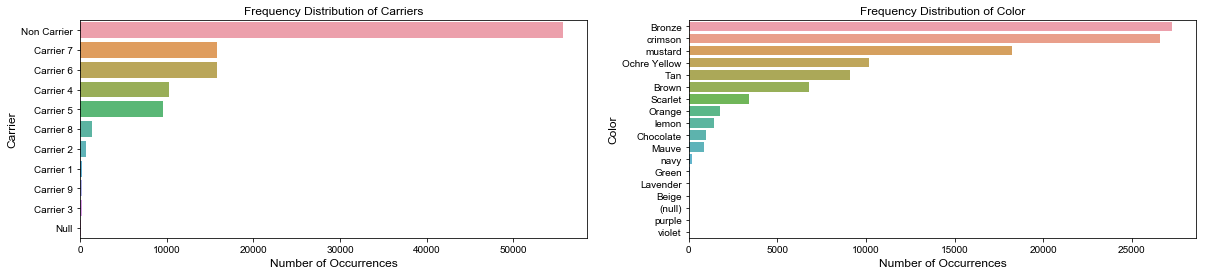

In [137]:
#Categorical feature distribution:
fig,ax = plt.subplots(1,2,figsize = (20,4)) 
carrier_count = data_df['Subscription sold by Carrier'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.values,carrier_count.index, alpha=0.9,ax=ax[0])
ax[0].set_title('Frequency Distribution of Carriers')
ax[0].set_xlabel('Number of Occurrences', fontsize=12)
ax[0].set_ylabel('Carrier', fontsize=12)

color_count = data_df['Device Covered - Color'].value_counts()
sns.set(style="darkgrid")
sns.barplot(color_count.values,color_count.index, alpha=0.9,ax=ax[1])
ax[1].set_title('Frequency Distribution of Color')
ax[1].set_xlabel('Number of Occurrences', fontsize=12)
ax[1].set_ylabel('Color', fontsize=12)
plt.show()

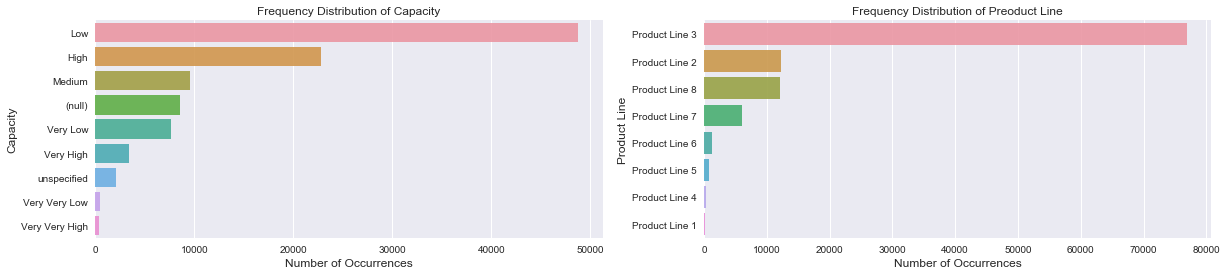

In [138]:
fig,ax = plt.subplots(1,2,figsize = (20,4)) 
capacity_count = data_df['Device Covered - Capacity'].value_counts()
sns.set(style="darkgrid")
sns.barplot(capacity_count.values,capacity_count.index, alpha=0.9,ax=ax[0])
ax[0].set_title('Frequency Distribution of Capacity')
ax[0].set_xlabel('Number of Occurrences', fontsize=12)
ax[0].set_ylabel('Capacity', fontsize=12)

product_line_count = data_df['Device Covered - Product Line'].value_counts()
sns.set(style="darkgrid")
sns.barplot(product_line_count.values,product_line_count.index, alpha=0.9,ax=ax[1])
ax[1].set_title('Frequency Distribution of Preoduct Line')
ax[1].set_xlabel('Number of Occurrences', fontsize=12)
ax[1].set_ylabel('Product Line', fontsize=12)

plt.show()

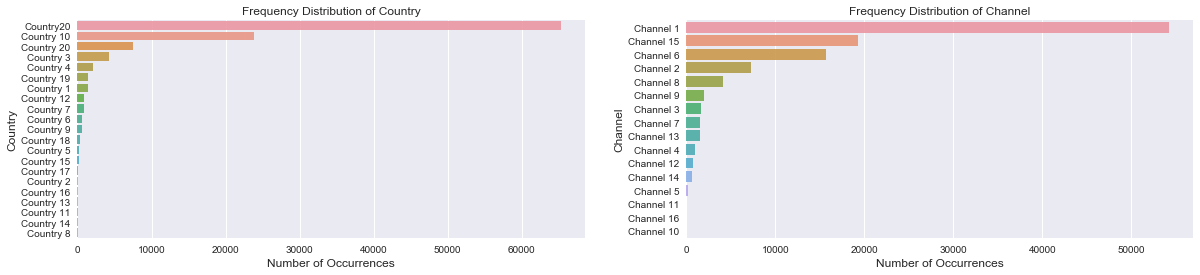

In [139]:
fig,ax = plt.subplots(1,2,figsize = (20,4)) 
country_count = data_df['Country of subscription purchase'].value_counts()
sns.set(style="darkgrid")
sns.barplot(country_count.values,country_count.index, alpha=0.9,ax=ax[0])
ax[0].set_title('Frequency Distribution of Country')
ax[0].set_xlabel('Number of Occurrences', fontsize=12)
ax[0].set_ylabel('Country', fontsize=12)

channel_count = data_df['Purchase Channel'].value_counts()
sns.set(style="darkgrid")
sns.barplot(channel_count.values,channel_count.index, alpha=0.9,ax=ax[1])
ax[1].set_title('Frequency Distribution of Channel')
ax[1].set_xlabel('Number of Occurrences', fontsize=12)
ax[1].set_ylabel('Channel', fontsize=12)
plt.show()

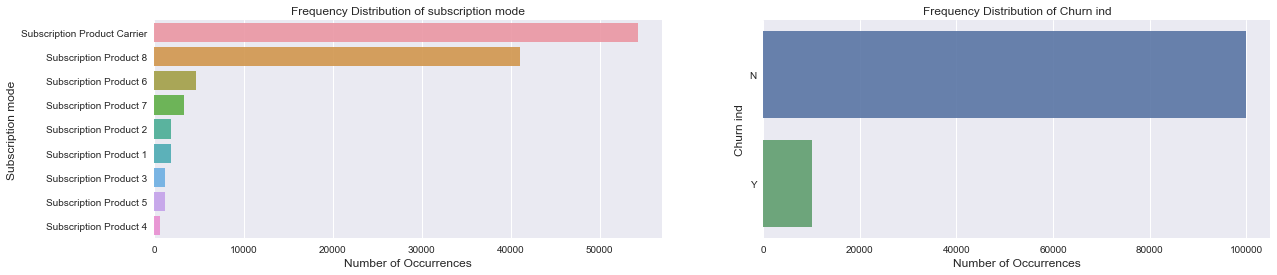

In [140]:
fig,ax = plt.subplots(1,2,figsize = (20,4)) 
subscription_mode_count = data_df['Subscription Mode'].value_counts()
sns.set(style="darkgrid")
sns.barplot(subscription_mode_count.values,subscription_mode_count.index, alpha=0.9,ax=ax[0])
ax[0].set_title('Frequency Distribution of subscription mode')
ax[0].set_xlabel('Number of Occurrences', fontsize=12)
ax[0].set_ylabel('Subscription mode', fontsize=12)

churn_ind_count = data_df['Churn Ind'].value_counts()
sns.set(style="darkgrid")
sns.barplot(churn_ind_count.values,churn_ind_count.index, alpha=0.9,ax=ax[1])
ax[1].set_title('Frequency Distribution of Churn ind')
ax[1].set_xlabel('Number of Occurrences', fontsize=12)
ax[1].set_ylabel('Churn ind', fontsize=12)

plt.show()

In [130]:
#Feature Engineering:
#active_days=no of days untill current date, customers was active
def days_between(d1, d2):
    return (d2 - d1).days

active_days = []
for index, row in data_df.iterrows():
    temp = days_between(row['Subscription Purchase Date'], row['Subscription Cancellation Date'])
    if temp < 0:
        data_df.drop(index, inplace=True)
    else:
        active_days.append(temp)

In [126]:
data_df.reset_index(inplace=True)
print(len(data_df))
print(len(active_days))

109997
109997


In [70]:
#revenue earned for each day of any subscription is $1
revenue = []
revenue = active_days*1

In [141]:
data_df['Active days'] = active_days
data_df['Revenue'] = revenue

In [142]:
data_df = data_df.drop(((data_df[data_df['Subscription Purchase Date'] > present_date])).index)

In [143]:
#Creating features for Purchase date,month and year
data_df['Subscription Purchase Date']  = pd.to_datetime(data_df['Subscription Purchase Date'])

data_df['Purchase Date'] = data_df['Subscription Purchase Date'].dt.day
data_df['Purchase Month'] = data_df['Subscription Purchase Date'].dt.month
data_df['Purchase Year'] = data_df['Subscription Purchase Date'].dt.year

In [144]:
data_df['Subscription Cancellation Date']  = pd.to_datetime(data_df['Subscription Cancellation Date'])

data_df['Cancellation Date'] = data_df['Subscription Cancellation Date'].dt.day
data_df['Cancellation Month'] = data_df['Subscription Cancellation Date'].dt.month
data_df['Cancellation Year'] = data_df['Subscription Cancellation Date'].dt.year

In [145]:
data_df.dtypes

index                                        int64
Subscription Id                              int64
Subscription Mode                           object
Subscription Purchase Date          datetime64[ns]
Subscription Cancellation Date      datetime64[ns]
Churn Ind                                   object
Country of subscription purchase            object
Purchase Channel                            object
Subscription sold by Carrier                object
Store id of subscription sale              float64
Device Covered - Product Line               object
Device Covered - SKU                        object
Device Covered - Capacity                   object
Device Covered - Color                      object
Active days                                  int64
Revenue                                      int64
Purchase Date                                int64
Purchase Month                               int64
Purchase Year                                int64
Cancellation Date              

In [146]:
#missing values
data_df.isnull().sum()

index                                  0
Subscription Id                        0
Subscription Mode                      0
Subscription Purchase Date             0
Subscription Cancellation Date         0
Churn Ind                              0
Country of subscription purchase      11
Purchase Channel                       0
Subscription sold by Carrier           0
Store id of subscription sale       2199
Device Covered - Product Line          0
Device Covered - SKU                1253
Device Covered - Capacity           6262
Device Covered - Color              3087
Active days                            0
Revenue                                0
Purchase Date                          0
Purchase Month                         0
Purchase Year                          0
Cancellation Date                      0
Cancellation Month                     0
Cancellation Year                      0
dtype: int64

In [147]:
#removings rows with missing values
data_df = data_df.dropna()
data_df.shape

(99782, 22)

In [148]:
constant_columns = [c for c in data_df.columns if data_df[c].nunique(dropna=False)==1]
print(constant_columns, len(constant_columns))

[] 0


In [149]:
#drop duplicate subcription accounts
data_df.drop_duplicates(subset = 'Subscription Id', keep = 'first', inplace = True)

In [150]:
data_df.shape

(99782, 22)

In [151]:
#check to see if there are 0 missing values
data_df.isnull().sum()

index                               0
Subscription Id                     0
Subscription Mode                   0
Subscription Purchase Date          0
Subscription Cancellation Date      0
Churn Ind                           0
Country of subscription purchase    0
Purchase Channel                    0
Subscription sold by Carrier        0
Store id of subscription sale       0
Device Covered - Product Line       0
Device Covered - SKU                0
Device Covered - Capacity           0
Device Covered - Color              0
Active days                         0
Revenue                             0
Purchase Date                       0
Purchase Month                      0
Purchase Year                       0
Cancellation Date                   0
Cancellation Month                  0
Cancellation Year                   0
dtype: int64

In [152]:
data_df.head()

,index,Subscription Id,Subscription Mode,Subscription Purchase Date,Subscription Cancellation Date,Churn Ind,Country of subscription purchase,Purchase Channel,Subscription sold by Carrier,Store id of subscription sale,...,Device Covered - Capacity,Device Covered - Color,Active days,Revenue,Purchase Date,Purchase Month,Purchase Year,Cancellation Date,Cancellation Month,Cancellation Year
0,0,34645276,Subscription Product Carrier,2018-09-21,2019-01-12,N,Country 20,Channel 1,Carrier 7,12458799.0,...,Low,crimson,113,113,21,9,2018,12,1,2019
1,1,34645277,Subscription Product 6,2018-11-23,2018-12-08,Y,Country 20,Channel 8,Non Carrier,12054878.0,...,High,crimson,15,15,23,11,2018,8,12,2018
2,2,34645278,Subscription Product Carrier,2018-11-03,2019-01-12,N,Country 20,Channel 1,Carrier 8,10457799.0,...,Very Low,Bronze,70,70,3,11,2018,12,1,2019
3,3,34645279,Subscription Product 6,2018-10-22,2019-01-12,N,Country 20,Channel 3,Non Carrier,14964174.0,...,High,Bronze,82,82,22,10,2018,12,1,2019
5,5,34645281,Subscription Product Carrier,2018-11-26,2019-01-12,N,Country 20,Channel 1,Carrier 7,12458799.0,...,Medium,Brown,47,47,26,11,2018,12,1,2019


In [153]:
data_df['Store id of subscription sale'] = data_df['Store id of subscription sale'].astype('int')

In [154]:
data_df.head()

,index,Subscription Id,Subscription Mode,Subscription Purchase Date,Subscription Cancellation Date,Churn Ind,Country of subscription purchase,Purchase Channel,Subscription sold by Carrier,Store id of subscription sale,...,Device Covered - Capacity,Device Covered - Color,Active days,Revenue,Purchase Date,Purchase Month,Purchase Year,Cancellation Date,Cancellation Month,Cancellation Year
0,0,34645276,Subscription Product Carrier,2018-09-21,2019-01-12,N,Country 20,Channel 1,Carrier 7,12458799,...,Low,crimson,113,113,21,9,2018,12,1,2019
1,1,34645277,Subscription Product 6,2018-11-23,2018-12-08,Y,Country 20,Channel 8,Non Carrier,12054878,...,High,crimson,15,15,23,11,2018,8,12,2018
2,2,34645278,Subscription Product Carrier,2018-11-03,2019-01-12,N,Country 20,Channel 1,Carrier 8,10457799,...,Very Low,Bronze,70,70,3,11,2018,12,1,2019
3,3,34645279,Subscription Product 6,2018-10-22,2019-01-12,N,Country 20,Channel 3,Non Carrier,14964174,...,High,Bronze,82,82,22,10,2018,12,1,2019
5,5,34645281,Subscription Product Carrier,2018-11-26,2019-01-12,N,Country 20,Channel 1,Carrier 7,12458799,...,Medium,Brown,47,47,26,11,2018,12,1,2019


In [155]:
#Lable encoding categorical columns
category_columns = ['Subscription Mode', 'Churn Ind', 'Country of subscription purchase', 'Purchase Channel',
                    'Subscription sold by Carrier', 'Device Covered - Product Line', 'Device Covered - SKU', 
                    'Device Covered - Capacity', 'Device Covered - Color', 'Store id of subscription sale']
for col in category_columns:
    print(col)
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(data_df[col].values.astype('str')))
    data_df[col] = lbl.transform(list(data_df[col].values.astype('str')))

Subscription Mode
Churn Ind
Country of subscription purchase
Purchase Channel
Subscription sold by Carrier
Device Covered - Product Line
Device Covered - SKU
Device Covered - Capacity
Device Covered - Color
Store id of subscription sale


In [29]:
print(data_df.dtypes)

index                                        int64
Subscription Id                              int64
Subscription Mode                            int64
Subscription Purchase Date          datetime64[ns]
Subscription Cancellation Date      datetime64[ns]
Churn Ind                                    int64
Country of subscription purchase             int64
Purchase Channel                             int64
Subscription sold by Carrier                 int64
Store id of subscription sale                int64
Device Covered - Product Line                int64
Device Covered - SKU                         int64
Device Covered - Capacity                    int64
Device Covered - Color                       int64
Active days                                  int64
Revenue                                      int64
Purchase Date                                int64
Purchase Month                               int64
Purchase Year                                int64
Cancellation Date              

In [156]:
data_df.head()

,index,Subscription Id,Subscription Mode,Subscription Purchase Date,Subscription Cancellation Date,Churn Ind,Country of subscription purchase,Purchase Channel,Subscription sold by Carrier,Store id of subscription sale,...,Device Covered - Capacity,Device Covered - Color,Active days,Revenue,Purchase Date,Purchase Month,Purchase Year,Cancellation Date,Cancellation Month,Cancellation Year
0,0,34645276,8,2018-09-21,2019-01-12,0,12,0,6,1086,...,2,12,113,113,21,9,2018,12,1,2019
1,1,34645277,5,2018-11-23,2018-12-08,1,12,13,9,974,...,1,12,15,15,23,11,2018,8,12,2018
2,2,34645278,8,2018-11-03,2019-01-12,0,12,0,7,384,...,5,2,70,70,3,11,2018,12,1,2019
3,3,34645279,5,2018-10-22,2019-01-12,0,12,8,9,1595,...,1,2,82,82,22,10,2018,12,1,2019
5,5,34645281,8,2018-11-26,2019-01-12,0,12,0,6,1086,...,3,3,47,47,26,11,2018,12,1,2019


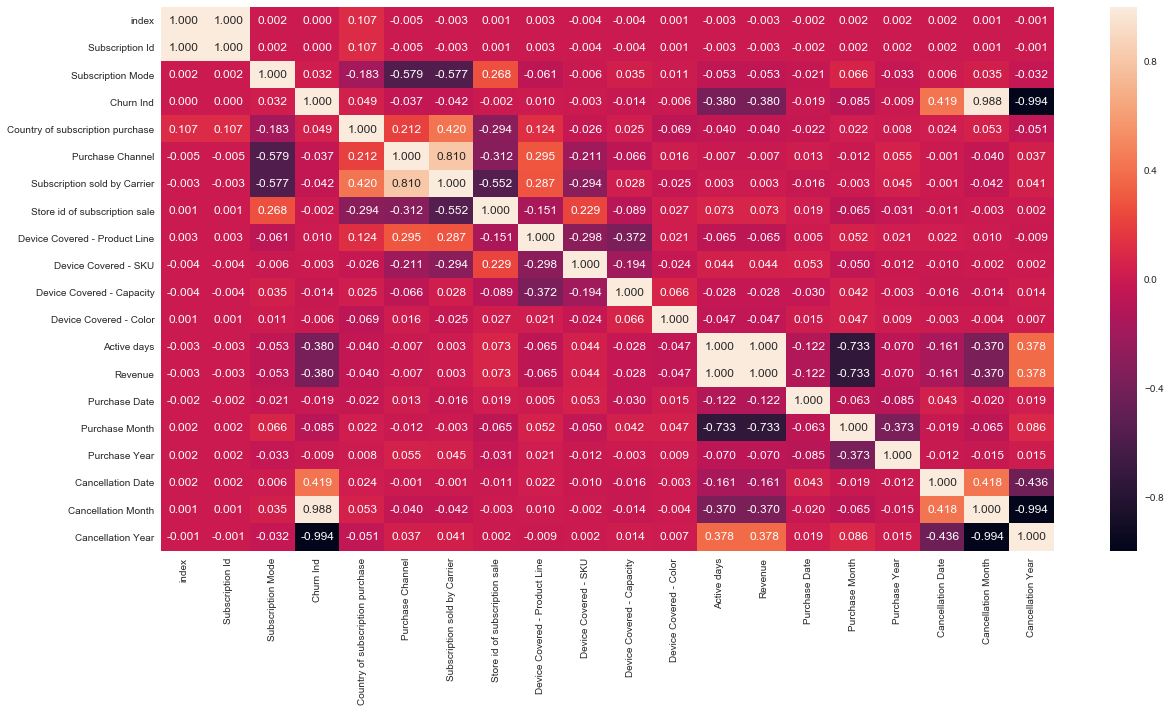

In [157]:
#heapmap of features
plt.figure(figsize=(20,10))
data_corr = data_df.corr()
sns.heatmap(data_corr,annot=True,fmt='0.3f')
plt.show()

In [158]:
#preparing data for training and testing
drop_columns = ['Churn Ind', 'index', 'Subscription Id', 'Subscription Purchase Date', 'Subscription Cancellation Date', 'Revenue','Cancellation Month','Cancellation Date','Cancellation Year']
X = data_df.drop(drop_columns, axis=1)
Y = data_df['Churn Ind']
#X = StandardScaler().fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print("Shape of x_train",X_train.shape)
print("Shape of y_train",Y_train.shape)
print("Shape of x_valid",X_test.shape)
print("Shape of y_valid",Y_test.shape)

Shape of x_train (79825, 13)
Shape of y_train (79825,)
Shape of x_valid (19957, 13)
Shape of y_valid (19957,)


In [159]:
kfold = StratifiedKFold(n_splits=3)
random_state = 10

          Algorithm  CrossValMeans  CrossValerrors
0      DecisionTree       0.999282    2.696626e-04
1      RandomForest       0.999454    9.797607e-05
2  GradientBoosting       0.999831    8.758151e-05
3          Logistic       0.988987    7.003683e-04
4          LightGBM       1.000000    4.803669e-08


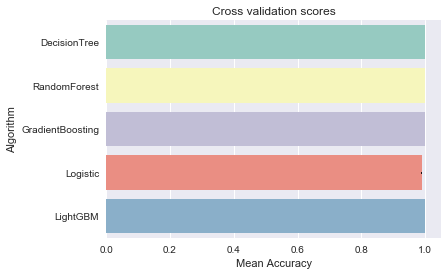

In [160]:
#Building baselines models
classifiers = []
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
#classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(lgb.LGBMRegressor(random_state = random_state))


cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "roc_auc", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["DecisionTree",
"RandomForest","GradientBoosting","Logistic","LightGBM"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")
print(cv_res)

In [161]:
#Light GBM
model = lgb.LGBMRegressor(objective='binary', njobs=9, n_estimators=100, learning_rate=0.03, sub_sample=0.75, max_depth=8)
model.fit(X_train, Y_train)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [163]:
print("Model Performance Metrics:")
print("-------------------------------")
rmse = np.sqrt(metrics.mean_squared_error(train_predictions, Y_train))
print("Train rmse:", rmse)
rmse = np.sqrt(metrics.mean_squared_error(test_predictions, Y_test))
print("Test rmse:", rmse)
mae = metrics.mean_absolute_error(test_predictions, Y_test)
evs = metrics.explained_variance_score(test_predictions, Y_test)
r2 = metrics.r2_score(test_predictions, Y_test)
f1_score = metrics.f1_score(test_predictions.round(), Y_test)
accuracy = metrics.accuracy_score(test_predictions.round(), Y_test)
print("Mean Absolute Error:", mae)
print("Explained Variance:", evs)
print("R2 Score:", r2)
print("F1 Score", f1_score)
print("Accuracy Score", accuracy)
fpr, tpr, _ = roc_curve(Y_test, test_predictions)
roc_auc = auc(fpr, tpr)
print("roc_auc:",roc_auc)
print("gini:",(roc_auc*2)-1)
print("-------------------------------")


Model Performance Metrics
-------------------------------
Train rmse: 0.0177910414324
Test rmse: 0.0214950318909
Mean Absolute Error: 0.00872089582814
Explained Variance: 0.993869979837
R2 Score: 0.993869889719
F1 Score 0.998366902559
Accuracy Score 0.99969935361
roc_auc: 0.999996670194
gini: 0.999993340389
-------------------------------


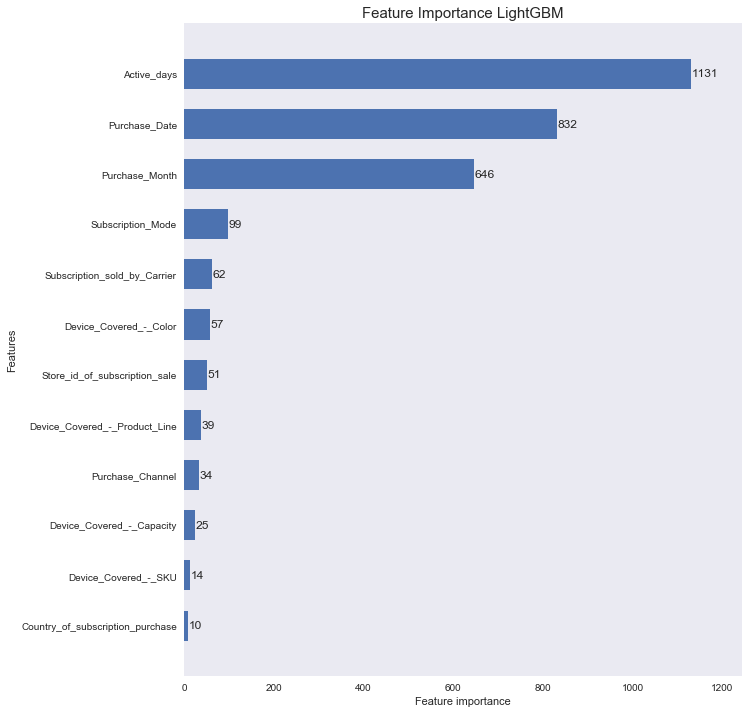

In [164]:
#ploting feature importance
fig, ax = plt.subplots(figsize=(10,12))
lgb.plot_importance(model, max_num_features=50, height=0.6, ax=ax)
ax.grid(False)
plt.title("Feature Importance LightGBM", fontsize=15)
plt.show()

In [165]:
#RandomForest Classifier
RFC = RandomForestClassifier()

## Search grid for optimal parameters
rf_param_grid = {"max_depth":[8] ,
              #"max_features":[19] ,
              "n_estimators" :[100],
              #"min_samples_leaf":[11],
              #"min_samples_split":[200],
              "criterion": ["gini"]}

gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="roc_auc", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,Y_train)

RFC_best = gsRFC.best_estimator_
gsRFC.grid_scores_, gsRFC.best_params_, gsRFC.best_score_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:   17.0s finished
C:\Users\rithesh\Anaconda3\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.99915, std: 0.00053, params: {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 100}],
 {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 100},
 0.9991501361530003)

In [167]:
pred_RFC = pd.Series(RFC_best.predict(X_test), name="RFC")
print("Model Performance Metrics:")
print("-------------------------------")
rmse = np.sqrt(metrics.mean_squared_error(pred_RFC, Y_test))
print("Test rmse:", rmse)
mae = metrics.mean_absolute_error(pred_RFC, Y_test)
evs = metrics.explained_variance_score(pred_RFC, Y_test)
r2 = metrics.r2_score(pred_RFC, Y_test)
f1_score = metrics.f1_score(pred_RFC.round(), Y_test)
accuracy = metrics.accuracy_score(pred_RFC.round(), Y_test)
print("Mean Absolute Error:", mae)
print("Explained Variance:", evs)
print("R2 Score:", r2)
print("F1 Score", f1_score)
print("Accuracy Score", accuracy)
fpr, tpr, _ = roc_curve(Y_test, pred_RFC)
roc_auc = auc(fpr, tpr)
print("roc_auc:",roc_auc)
print("gini:",(roc_auc*2)-1)
print("-------------------------------")


Model Performance Metrics:
-------------------------------
Test rmse: 0.115883010295
Mean Absolute Error: 0.013428872075
Explained Variance: 0.817424593149
R2 Score: 0.814939438543
F1 Score 0.921453692849
Accuracy Score 0.986571127925
roc_auc: 0.927173913043
gini: 0.854347826087
-------------------------------


Text(0.5,1,'feature importance')

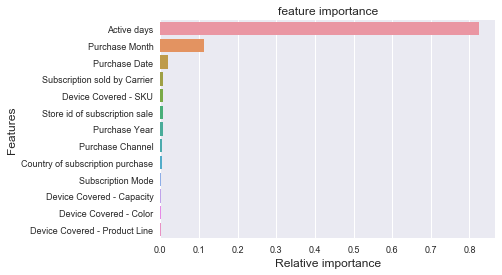

In [168]:
indices = np.argsort(RFC_best.feature_importances_)[::-1][:40]
g = sns.barplot(y=X_train.columns[indices][:40],x = RFC_best.feature_importances_[indices][:40] , orient='h')
g.set_xlabel("Relative importance",fontsize=12)
g.set_ylabel("Features",fontsize=12)
g.tick_params(labelsize=9)
g.set_title("Random Forest feature importance")

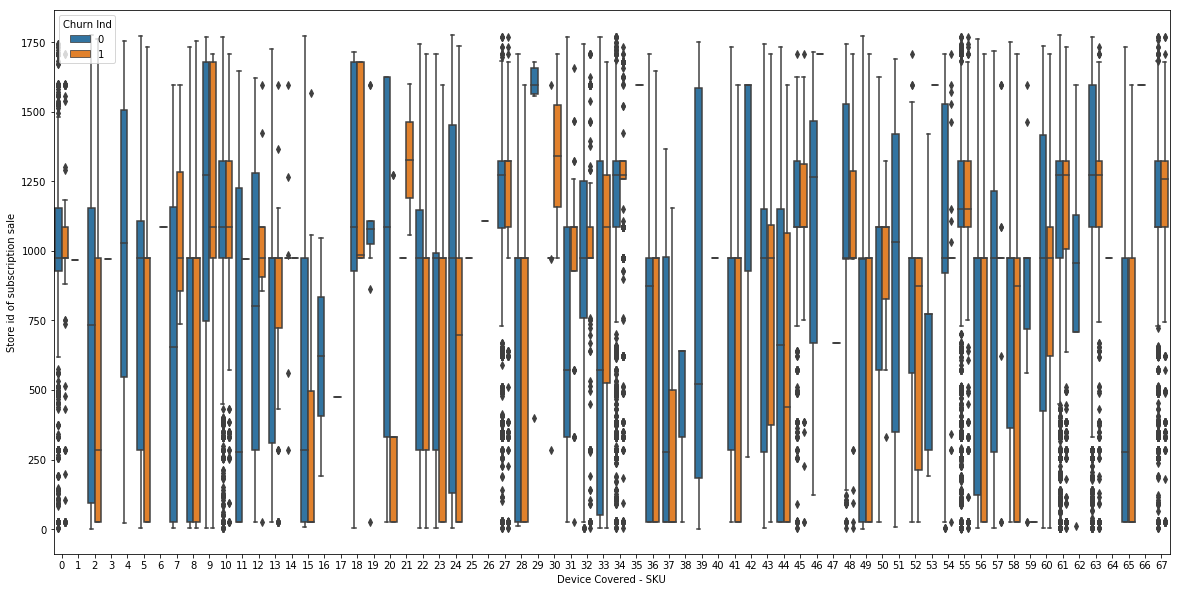

In [95]:
plt.figure(figsize=(20, 10))
sns.boxplot(x="Device Covered - SKU", y="Store id of subscription sale", hue="Churn Ind",  data=data_df)
plt.show()

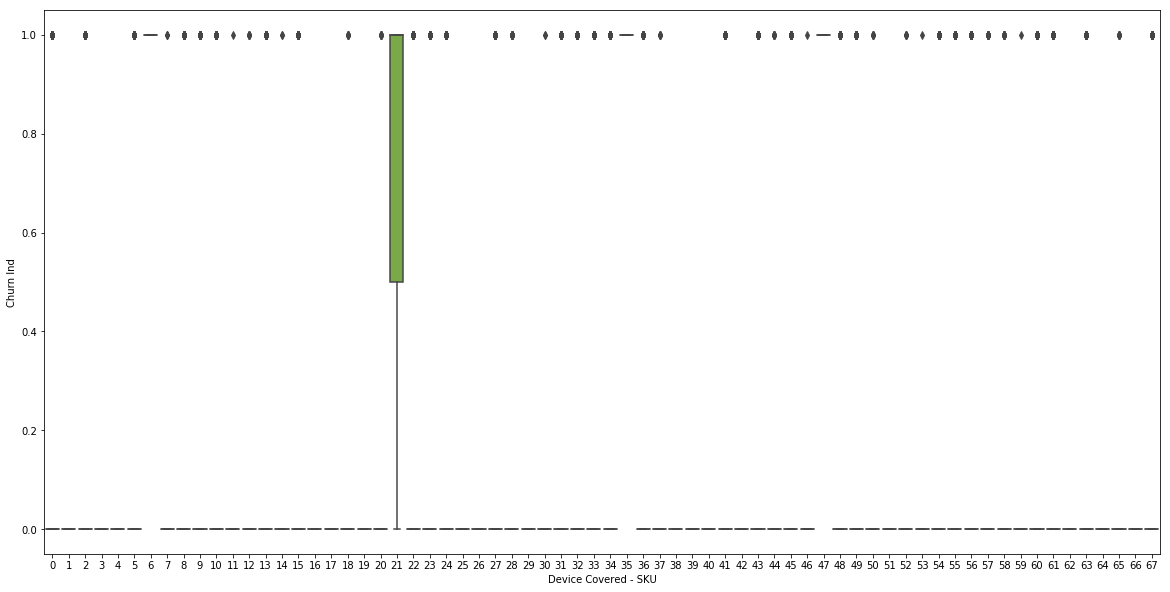

In [96]:
plt.figure(figsize=(20, 10))
sns.boxplot(x="Device Covered - SKU", y="Churn Ind", data=data_df)
plt.show()

In [ ]:
data_df.loc[data_df['Churn Ind'] == 1]